In [2]:
import seaborn as sb
import scipy
import math
import statistics as stat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#11.1
a = "1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938446095505822317253594081284811174502841027019385211055596446229489549303819644288109756659334461284756482337867831652712019091456485669234603486104543266482133936072602491412737245870066063155881748815209209628292540917153643678925903600113305305488204665213841469519415116094330572703657595919530921861173819326117931051185480744623799627495673518857527248912279381830119491298336733624406566430860213949463952247371907021798609437027705392171762931767523846748184676694051320005681271452635608277857713427577896091736371787214684409012249534301465495853710507922796892589235420199561121290219608640344181598136297747713099605187072113499999983729780499510597317328160963185950244594553469083026425223082533446850352619311881710100031378387528865875332083814206171776691473035982534904287554687311595628638823537875937519577818577805321712268066130019278766111959092164201989"
counts = [0,0,0,0,0,0,0,0,0,0]
for i in range(1000):
    for j in range(10):
        if int(a[i]) == j:
            counts[j] += 1
            break
print(counts)
ddof = 9
expect = [100,100,100,100,100,100,100,100,100,100]
alpha = 0.05
chisquare = scipy.stats.chisquare(counts,expect,ddof)[0]
print(scipy.stats.chisquare(counts,expect,ddof))
x_1_alpha = scipy.stats.chi2.ppf(1-alpha, ddof)
if chisquare < x_1_alpha:
    print('Хи квадрат принял гипотезу о равномерном распределении')
else:
    print('Хи квадрат отверг гипотезу о равномерном распределении')

[93, 116, 103, 102, 93, 97, 94, 95, 101, 106]


TypeError: chisquare() got an unexpected keyword argument 'lambda_'

In [9]:
scipy.stats.chisquare(counts,expect,ddof)

Power_divergenceResult(statistic=4.739999999999999, pvalue=nan)

In [10]:
#11.2(a)
df =pd.read_csv(r"Priem.csv")
alpha = 0.05
cut1 = [50,60,70,80,90,100]
cut2 = [2 * n for n in cut1]
df['Сумма.баллов'] = df['ЕГЭ...рус.яз.'] + df['ЕГЭ...матем.']
df1 = df[df['Пол'] == 'ЖЕНСКИЙ']
df2 = df[df['Пол'] == 'МУЖСКОЙ']

count_female_rus = df1.groupby(pd.cut(df1['ЕГЭ...рус.яз.'],bins=cut1))['ЕГЭ...рус.яз.'].count().to_numpy()
count_female_math = df1.groupby(pd.cut(df1['ЕГЭ...матем.'],bins=cut1))['ЕГЭ...матем.'].count().to_numpy()
count_female_sum = df1.groupby(pd.cut(df1['Сумма.баллов'], bins=cut2))['Сумма.баллов'].count().to_numpy()

count_male_rus = df2.groupby(pd.cut(df2['ЕГЭ...рус.яз.'],bins=cut1))['ЕГЭ...рус.яз.'].count().to_numpy()
count_male_math = df2.groupby(pd.cut(df2['ЕГЭ...матем.'],bins=cut1))['ЕГЭ...матем.'].count().to_numpy()
count_male_sum = df2.groupby(pd.cut(df2['Сумма.баллов'], bins=cut2))['Сумма.баллов'].count().to_numpy()

rus = [count_female_rus,count_male_rus]
rus_test_pvalue = scipy.stats.chi2_contingency(rus,len(cut1)-1).pvalue
print('rus',rus_test_pvalue)
if rus_test_pvalue > alpha:
    print('Хи-квадрат принял гипотезу однородности баллов по русскому для мальчиков и девочек\n')
else:
    print('Хи-квадрат отверг гипотезу однородности баллов по русскому для мальчиков и девочек\n')

math = [count_female_math,count_male_math]
math_test_pvalue = scipy.stats.chi2_contingency(math,len(cut1)-1).pvalue
print('math',math_test_pvalue)
if math_test_pvalue > alpha:
    print('Хи-квадрат принял гипотезу однородности баллов по математике для мальчиков и девочек\n')
else:
    print('Хи-квадрат отверг гипотезу однородности баллов по математике для мальчиков и девочек\n')
    
sum_ = [count_female_sum,count_male_sum]
sum_test_pvalue = scipy.stats.chi2_contingency(sum_,len(cut1)-1).pvalue
print('sum',sum_test_pvalue)
if sum_test_pvalue > alpha:
    print('Хи-квадрат принял гипотезу однородности суммы баллов для мальчиков и девочек\n')
else:
    print('Хи-квадрат отверг гипотезу однородности суммы баллов для мальчиков и девочек\n')

rus 9.405879220052292e-15
Хи-квадрат отверг гипотезу однородности баллов по русскому для мальчиков и девочек

math 0.3273978037401095
Хи-квадрат принял гипотезу однородности баллов по математике для мальчиков и девочек

sum 5.940158790618788e-05
Хи-квадрат отверг гипотезу однородности суммы баллов для мальчиков и девочек



In [11]:
#11.2(b)
count_rus = df.groupby(pd.cut(df['ЕГЭ...рус.яз.'],bins=cut1))['ЕГЭ...рус.яз.'].count().to_numpy()
count_math = df.groupby(pd.cut(df['ЕГЭ...матем.'],bins=cut1))['ЕГЭ...матем.'].count().to_numpy()
indep = [count_rus, count_math]
indep_test_pvalue = scipy.stats.chi2_contingency(indep,len(cut1)-1).pvalue
print(indep_test_pvalue)
if indep_test_pvalue > alpha:
    print('Хи-квадрат принял гипотезу независимости баллов по русскому языку и математике\n')
else:
    print('Хи-квадрат отверг гипотезу независимости баллов по русскому языку и математике\n')

2.6980599508850006e-18
Хи-квадрат отверг гипотезу независимости баллов по русскому языку и математике



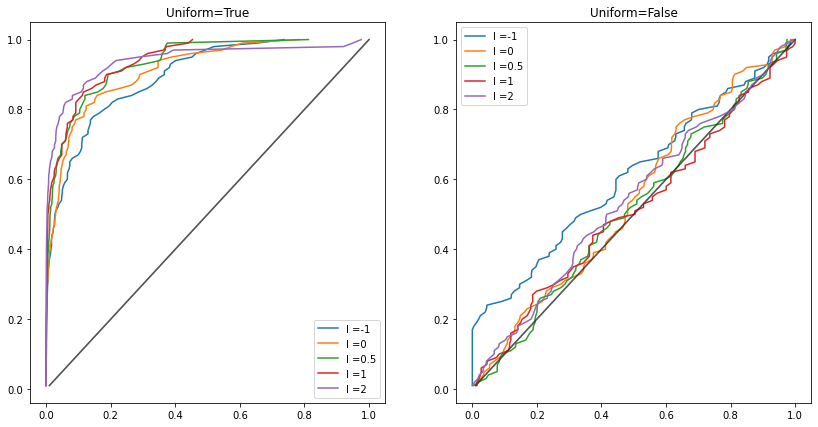

In [16]:
#11.3
n = 30
uniform = [1/5,1/5,1/5,1/5,1/5] #k=5
nonuniform = [1/5,1/5,2/5,1/10,1/10]
L = [-1,0,0.5,1,2]
fig, ax = plt.subplots(1,2,figsize=(14,7))
m = 100
for i in range(len(L)):
    P1 = []
    P2 = []
    for j in range(m):
        x = scipy.stats.multinomial.rvs(n,uniform)
        y = scipy.stats.multinomial.rvs(n,nonuniform)
        p1 = scipy.stats.power_divergence(x,[q*n for q in nonuniform],lambda_=L[i]).pvalue
        p2 = scipy.stats.power_divergence(y,[q*n for q in nonuniform],lambda_=L[i]).pvalue
        P1.append(p1)
        P2.append(p2)
    P1 = np.array(P1)
    P2 = np.array(P2)
    P1 = np.sort(P1)
    P2 = np.sort(P2)
    z = [float(i+1)/m for i in range(m)]
    ax[0].set_title('Uniform=True')
    ax[0].plot(P1,z,label='l ='+str(L[i]))
    ax[0].plot(z,z,color='black',alpha=0.2)
    ax[1].set_title('Uniform=False')
    ax[1].plot(P2,z,label='l ='+str(L[i]))
    ax[1].plot(z,z,color='black',alpha=0.2)
ax[0].legend()
ax[1].legend()
plt.show()